# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2024/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday October 1st, 2024 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via DTU Learn

# Part 1: Exploring the friendship paradox. 

This first part draws on the friendship paradox exercise from Week 3. You should provide solutions to the following exercises from **Part 3** of that week.

* *The friendship paradox in BA networks*
* *The friendship paradox more generally*
* *The friendship paradox and the configuration model*
* *Growth without preferential attachment*


*Exercise*. The friendship paradox in BA networks

> * Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
> * Find $i$'s [neighbors](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html?highlight=neighbors#networkx.Graph.neighbors). And calculate their average degree.
> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true in **F-BA**?

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import stats
import seaborn as sns
sns.set_theme(font_scale=1.5)

In [3]:
#The BA networks with 5000 nodes
G = nx.Graph()
G.add_edge(1, 2)

def add_node_BA(G):
    degrees = dict(G.degree()) #{1:2,2:3,3:4} the dict of the node and degree 
    total_degree = sum(degrees.values())  
    probabilities = [degree / total_degree for degree in degrees.values()] #\prob(k_i) = k_i/ sum_j(k_k_i)
    nodes = list(degrees.keys()) 
    selected_node = random.choices(nodes, probabilities)[0] #choice the existing nodes in proportion to their degree.
    new_node = max(G.nodes) + 1 #use Integers to represent the new code
    G.add_edge(new_node, selected_node) #add the new node and new edge

while len(G.nodes) < 5000:
    add_node_BA(G)
#The friendship paradox in BA networks
friendship_paradox = 0
iterations = 1000

for _ in range(iterations):
    node_i = random.choice(list(G.nodes)) # random choose node i
    degree_i = G.degree(node_i) #get the degree of the node
    neighbors = list(G.neighbors(node_i)) #get the neighbors of the node 
    if neighbors: 
        neighbor_degrees = [G.degree(n) for n in neighbors] #get the degree of neighbors
        avg_neighbor_degree = sum(neighbor_degrees) / len(neighbors) # get the avgerage degree of the neighbors
        if avg_neighbor_degree > degree_i: 
            friendship_paradox += 1

# Output the results
print("friendship paradox in BA networks:", friendship_paradox)

friendship paradox in BA networks: 856


*Exercise*. The friendship paradox more generally
> * What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower? 
>  - First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?

I reckon the flatter power-law (γ=2) will lead to the increase of the frequence of the friendship paradox, a flatter power law results in more nodes with higher degrees(more hubs). This can create situations where the degree of neighbors is still significantly larger than that of the selected node, even though there are fewer extreme hubs(since it is more flatter). As a result, the paradox occurs more frequently in this configuration because, on average, many nodes are connected to higher-degree neighbors, even if the overall distribution is more balanced.

>  - Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.
>     * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details.
>     * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
>     * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.
> - Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

According to the frequence of the friendship paradox presents in the code, which is usually more than 95% we can say that most of thetime the friendship paradox is true when slope lamma=2. Therefore the reason is correctly

In [4]:
#The friendship paradox more generally
n_nodes = 5000 
gamma = 2  # exponent 
x_min = 1  # Minimum degree

# Generate degree sequence
def generate_sequence(n, gamma, x_min):
    degree_sequence = []
    for _ in range(n):
        r = random.random() # Generates a random number r uniformly distributed between 0 and 1.
        degree = x_min * (1 - r) ** (-1 / (gamma - 1))  # power law transformation
        degree_sequence.append(int(round(degree))) #degree must be integer
    # ensure the sum of the degree sequence is even
    if sum(degree_sequence) % 2 != 0:
        min_index = degree_sequence.index(min(degree_sequence))  # find the index of the node with the smallest degree
        degree_sequence[min_index] += 1 # add 1 to make sure even
    return degree_sequence

degree_sequence = generate_sequence(n_nodes, gamma, x_min) # generate the degree sequence
G_general_r = nx.configuration_model(degree_sequence) # create a graph using the configuration model
# change the multigraph into normal one 
G_general = nx.Graph(G_general_r)
G_general.remove_edges_from(nx.selfloop_edges(G_general))

friendship_paradox = 0
iterations = 1000

for _ in range(iterations):
    node_i = random.choice(list(G_general.nodes())) # random choose node i
    degree_i = G_general.degree(node_i) #get the degree of the node
    neighbors = list(G_general.neighbors(node_i)) #get the neighbors of the node 
    if neighbors: 
        neighbor_degrees = [G_general.degree(n) for n in neighbors] #get the degree of neighbors
        avg_neighbor_degree = sum(neighbor_degrees) / len(neighbors) # get the avgerage degree of the neighbors
        if avg_neighbor_degree > degree_i: 
            friendship_paradox += 1

print("Friendship Paradox more generally:", friendship_paradox)

Friendship Paradox more generally: 969


*Exercise*. The friendship paradox and the configuration model
> - Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in A above*; let's call this new network **F-CM** (for *friendship configuration model*). 
>    - What fraction of the time is the friendship paradox is true for the **F-CM** network?

according to the result that friendship Paradox of F-CM is around 65 precentage the friendship paradox is true for the F-CM network but not as significant as the friendship in F-BA network(more than 86 precentage)

>    - Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
>       * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).

Assortativity: assortativity means nodes in a network like to connect to other nodes that are similar in some way, In F-BA network the assortativity is not very strong since new node connect the network depending on the degree of the other nodes there is no tendency that node link with the node that is similar, however in the F-CM network, it generates randomly from the degree sequence this network with higher possibility to present the assortativity among the nodes which may lead to the node with higher degree connect with the node with higher degree reduce the chance of the friendship paradox

clustering, community structure: In F-BA networks, clustering is generally lower, the nodes with higher degree(hubs) tend to connect to many low-degree nodes. In F-CM network since the random generation clustering is more frequent, reducing the difference in degree between connected nodes led to the reduction of the possibility of friendship paradox.

Preferential Attachment nad Random Attachment: F-BA is built using preferential attachment, which creats a small number of large hubs that dominate the network. This increases the likelihood of the friendship paradox because most nodes are linked to these large hubs.
In F-CM, connections are randomly generated based on the degree sequence, so even if the same number of high-degree nodes exists, the lack of preferential attachment reduces the connection to these hubs.

>    * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)

To test more rigorously, first of all I need add the numbers of the samples therefore I create 10 different different models for F-BA and FCm network repectively then their means and variance will be a good information to exhibit the friendship-paradox frequence. Statistically I adpot t-test to test the difference between F-BA and F-CM within friendship paradox, my hypothesis is here is no significant difference between the frequency of the friendship paradox in the F-BA and F-CM networks. According to the result P_value << 0.05 which is means I need reject my hypothesis therefore there is a significant difference between F-BA and F-CM within the frequence of friendship paradox. Future I plot the error bar to better display the overall range of data, which it is ver obviously that the frequence of friendship paradox in F-BA is higher than F-CM and the frequence of friendship paradox in the F-CM with higher variance.

Thus, we can conclude that the friendship paradox occurs significantly more often in the F-BA network compared to the F-CM network


In [5]:
#The F-CM network has 5000 nodes and a power-law degree distribution with slope same as F-AB
degree_sequence_FBA  = [G.degree(node) for node in G.nodes]
if sum(degree_sequence) % 2 != 0:
    min_index = degree_sequence.index(min(degree_sequence))  # find the index of the node with the smallest degree
    degree_sequence[min_index] += 1 # add 1 to make sure even
G_CM_r = nx.configuration_model(degree_sequence_FBA) # create a graph using the configuration model
# change the multigraph into normal one 
G_CM = nx.Graph(G_CM_r)
G_CM.remove_edges_from(nx.selfloop_edges(G_CM))
friendship_paradox = 0
iterations = 1000

for _ in range(iterations):
    node_i = random.choice(list(G_CM.nodes())) # random choose node i
    degree_i = G_CM.degree(node_i) #get the degree of the node
    neighbors = list(G_CM.neighbors(node_i)) #get the neighbors of the node 
    if neighbors: 
        neighbor_degrees = [G_CM.degree(n) for n in neighbors] #get the degree of neighbors
        avg_neighbor_degree = sum(neighbor_degrees) / len(neighbors) # get the avgerage degree of the neighbors
        if avg_neighbor_degree > degree_i: 
            friendship_paradox += 1

print("Friendship Paradox F-CM:", friendship_paradox)

Friendship Paradox F-CM: 677


In [6]:
# The F-BA network with 5000 nodes and power-law degree distribution
def Fri_para_count_BA():
    G = nx.Graph()
    G.add_edge(1, 2)

    def add_node_BA(G):
        degrees = dict(G.degree())  # Get the degree of each node
        total_degree = sum(degrees.values())  
        probabilities = [degree / total_degree for degree in degrees.values()]  # Preferential attachment
        nodes = list(degrees.keys()) 
        selected_node = random.choices(nodes, probabilities)[0]  # Select a node based on degree
        new_node = max(G.nodes) + 1  # Add new node with max integer
        G.add_edge(new_node, selected_node)  # Add new edge

    while len(G.nodes) < 5000:
        add_node_BA(G)

    friendship_paradox_BA = 0
    iterations = 1000
    for _ in range(iterations):
        node_i = random.choice(list(G.nodes))  # Randomly choose node i
        degree_i = G.degree(node_i)  # Get the degree of node i
        neighbors = list(G.neighbors(node_i))  # Get the neighbors of node i
        if neighbors: 
            neighbor_degrees = [G.degree(n) for n in neighbors]  # Get the degrees of neighbors
            avg_neighbor_degree = sum(neighbor_degrees) / len(neighbors)  # Calculate avg neighbor degree
            if avg_neighbor_degree > degree_i:  # Compare degrees
                friendship_paradox_BA += 1

    return G, friendship_paradox_BA

# The F-CM network with 5000 nodes and power-law degree distribution
def Fri_para_count_CM(G):
    degree_sequence_FBA = [G.degree(node) for node in G.nodes]  # Get the degree sequence
    if sum(degree_sequence_FBA) % 2 != 0:
        min_index = degree_sequence_FBA.index(min(degree_sequence_FBA))  # Find the smallest degree
        degree_sequence_FBA[min_index] += 1  # Make the degree sequence even

    G_CM_r = nx.configuration_model(degree_sequence_FBA)  # Create a graph using the configuration model
    G_CM = nx.Graph(G_CM_r)  # Convert to a simple graph
    G_CM.remove_edges_from(nx.selfloop_edges(G_CM))  # Remove self-loops

    friendship_paradox = 0
    iterations = 1000
    for _ in range(iterations):
        node_i = random.choice(list(G_CM.nodes()))  # Randomly choose node i
        degree_i = G_CM.degree(node_i)  # Get the degree of node i
        neighbors = list(G_CM.neighbors(node_i))  # Get the neighbors of node i
        if neighbors: 
            neighbor_degrees = [G_CM.degree(n) for n in neighbors]  # Get the degrees of neighbors
            avg_neighbor_degree = sum(neighbor_degrees) / len(neighbors)  # Calculate avg neighbor degree
            if avg_neighbor_degree > degree_i:  # Compare degrees
                friendship_paradox += 1

    return friendship_paradox

# get 10 different data to test more rigorously
F_BA = []
F_CM = []
for i in range(10):
    G, friendship_paradox_BA = Fri_para_count_BA()
    F_BA.append(friendship_paradox_BA)

    friendship_paradox_CM = Fri_para_count_CM(G)
    F_CM.append(friendship_paradox_CM)

print(F_BA, F_CM)

[878, 865, 859, 862, 854, 846, 864, 885, 860, 834] [639, 660, 616, 656, 665, 658, 661, 633, 650, 649]


In [7]:
#t-test
t_stat, p_value = stats.ttest_ind(F_BA, F_CM)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 31.8230801026467
P-value: 2.824526403760915e-17


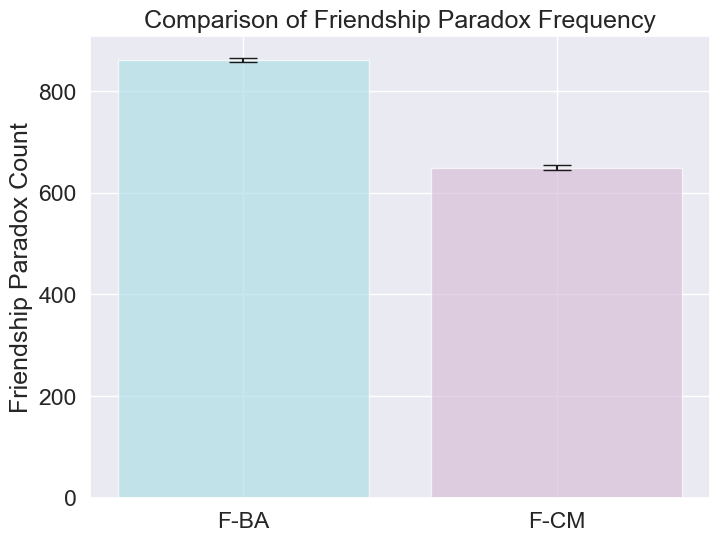

In [8]:
# errorbar
means = [np.mean(F_BA), np.mean(F_CM)]
std_errors = [np.std(F_BA, ddof=1) / np.sqrt(len(F_BA)), np.std(F_CM, ddof=1) / np.sqrt(len(F_CM))]

labels = ['F-BA', 'F-CM']
x_pos = np.arange(len(labels))

plt.figure(figsize=(8, 6))
plt.bar(x_pos, means, yerr=std_errors, align='center', alpha=0.7, capsize=10, color=['powderblue', 'thistle'])
plt.xticks(x_pos, labels)
plt.ylabel('Friendship Paradox Count')
plt.title('Comparison of Friendship Paradox Frequency')
plt.grid(True, axis='y')
plt.show()

*Exercise*: Growth without preferential attachment

> Finally, we'll build a network of same size and degree as in the exercise above, *using the growth mechanism without the preferential attachment*. Follow the steps below for success
> 
>  1. Grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.
>  2. Generate an ER network of same number of nodes and links as the Sune-network. 
> * What are the differences between the ER network and the Sune-network? Explain in your own words. 
>   * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

Degree distribution: According to the degree distribution, the ER network would be more similar to the poission distribution than the Sune network, which means the ER network has higher randomness,  the distribution is tightly centered, with relatively little variation. The sune network is the opposite.

The number of connected components: Due to the algorithm of creating the Sune network we can know that every node is connected with at least one node in the graph i.e. there is low possibility that isolated node exist in the Sune network however in the ER network since it with high randomness sometimes we can observed the isolated nodes or the little clusters 

<div class="alert alert-block alert-info">
Feel free to go nuts in asking an LLM to help you for this last exercise.
</div>

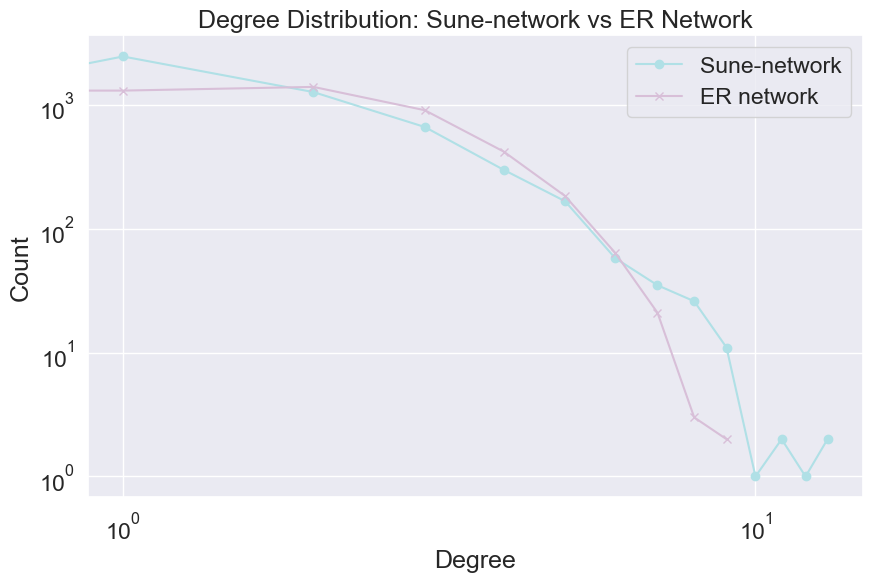

In [10]:
# Growth without preferential attachment
G_sune = nx.Graph()
G_sune.add_edge(1, 2)

def add_node_SUNE(G):
    degrees = dict(G.degree()) #{1:2,2:3,3:4} the dict of the node and degree 
    selected_node = random.choice(list(G.nodes()))
    new_node = max(G.nodes) + 1 #use Integers to represent the new code
    G.add_edge(new_node, selected_node) #add the new node and new edge

while len(G_sune.nodes) < 5000:
    add_node_SUNE(G_sune)

n_nodes = len(G_sune.nodes())
n_edges_sune = len(G_sune.edges())  
G_ER = nx.gnm_random_graph(n_nodes, n_edges_sune) 

degrees_sune = [G_sune.degree(n) for n in G_sune.nodes()]  # degree distribution for Sune-network
degree_count_sune = np.bincount(degrees_sune) 

degrees_ER = [G_ER.degree(n) for n in G_ER.nodes()]  # degree distribution for ER network
degree_count_ER = np.bincount(degrees_ER)  

plt.figure(figsize=(10, 6))
plt.plot(degree_count_sune, label="Sune-network", marker='o', color='powderblue')
plt.plot(degree_count_ER, label="ER network", marker='x', color='thistle')
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degree Distribution: Sune-network vs ER Network")
plt.legend()
plt.show()

# Part 2: Stats of the Country Music Network

This second part requires you to have built the network of Country Musicians as described in the exercises for Week 4. You should complete the following exercise from **Part 2**.

* *Simple network statistics and analysis*

And the following exercise from **Part 3**

* *Let's build a simple visualization of the network*

And that's it! You're all set.

In [1]:
# Wiki pages download
import urllib.request
import urllib.parse  # Import to handle URL encoding
import json
import re
import os

# Network
import networkx as nx

### Downloading the wiki pages

In [2]:
# Function to query Wikipedia API and get the page content
def get_wiki(title):
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    content = "prop=revisions&rvprop=content"
    dataformat = "format=json"
    
    # URL-encode the title to handle spaces and special characters
    title = "titles={}".format(urllib.parse.quote(title))
    
    # Build the query URL
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    
    # Make the request to Wikipedia API
    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    
    # Decode and return the JSON data
    wikitext = wikidata.decode('utf-8')
    return json.loads(wikitext)

# Function to extract page content from the API response
def extract_page_content(wiki_data):
    try:
        # Get the page key (pageid) dynamically (since page IDs can vary)
        page = list(wiki_data['query']['pages'].values())[0]
        return page['revisions'][0]['*']  # Return the raw page content
    except KeyError:
        return None  # In case there's no content found
    
# Function to format a valid filename from an artist name
def format_filename(artist_name):
    # Remove characters that are invalid for filenames on most systems
    return re.sub(r'[\\/*?:"<>|]', '', artist_name)


In [3]:
title = "List_of_country_music_performers"
country_music = get_wiki(title)

# Get only the page content
country_music_content = country_music['query']['pages']['328877']['revisions'][0]['*']

In [4]:
# Regular expression to match both patterns
pattern = c

# Find all matches
matches = re.findall(pattern, country_music_content)

# Extract only the artist names (filtering out empty matches)
artist_names = [m[0] if m[0] else m[1] for m in matches]

# Print the length of the list f-string
print(f"Extracted {len(artist_names)} artist names")

# Print the first 5 artist names
print(f"First 5 artist names: {artist_names[:5]}")

Extracted 2101 artist names
First 5 artist names: ['3 of Hearts', '4 Runner', '8 Ball Aitken', 'The Abrams Brothers', 'Ace in the Hole Band']


In [10]:
# Create a directory to save the wiki pages (if it doesn't already exist)
output_dir = "wiki_pages"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through each artist, fetch their Wikipedia page, and save it
for artist in artist_names:
    #print(f"Fetching Wikipedia page for {artist}...")
    wiki_data = get_wiki(artist)
    page_content = extract_page_content(wiki_data)
    
    if page_content:
        # Format the filename and create the full path
        filename = format_filename(artist) + ".txt"
        file_path = os.path.join(output_dir, filename)

        # Check if the file already exists
        if os.path.exists(file_path):
            #print(f"File already exists for {artist}, skipping...")
            continue
        
        # Write the page content to a text file
        with open(file_path, 'w', encoding='utf-8') as f:
            f.write(page_content)
        
        #print(f"Saved Wikipedia page for {artist} as {filename}")
    else:
        print(f"Wikipedia page for {artist} does not exist or has no content.")

Fetching Wikipedia page for 3 of Hearts...
File already exists for 3 of Hearts, skipping...
Fetching Wikipedia page for 4 Runner...
File already exists for 4 Runner, skipping...
Fetching Wikipedia page for 8 Ball Aitken...
File already exists for 8 Ball Aitken, skipping...
Fetching Wikipedia page for The Abrams Brothers...
File already exists for The Abrams Brothers, skipping...
Fetching Wikipedia page for Ace in the Hole Band...
File already exists for Ace in the Hole Band, skipping...
Fetching Wikipedia page for Roy Acuff...
File already exists for Roy Acuff, skipping...
Fetching Wikipedia page for Kay Adams...
File already exists for Kay Adams, skipping...
Fetching Wikipedia page for Ryan Adams...
File already exists for Ryan Adams, skipping...
Fetching Wikipedia page for Doug Adkins...
File already exists for Doug Adkins, skipping...
Fetching Wikipedia page for Trace Adkins...
File already exists for Trace Adkins, skipping...
Fetching Wikipedia page for David "Stringbean" Akeman...

### Creating the network

In [13]:
import networkx as nx

In [14]:
def extract_wiki_links(page_content):
    # Regular expression to capture links of the format [[Title]] or [[Title|Display]]
    pattern = r'\[\[([^\|\]]+)(?:\|[^\]]+)?\]\]'
    return re.findall(pattern, page_content)

# Function to count words in content
def count_words(content):
    return len(re.findall(r'\b\w+\b', content))

In [15]:
# Create a directed graph
G = nx.DiGraph()

# Directory where the Wikipedia pages are stored
wiki_dir = "wiki_pages"

# A set for fast lookups of performer names
artist_set = set(artist_names)

# Loop over all the downloaded Wikipedia pages
for artist in artist_names:
    # Get the file path of the Wikipedia page for the artist
    file_name = format_filename(artist) + ".txt"
    file_path = os.path.join(wiki_dir, file_name)
    
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File not found: {file_name}")
        continue

    # Read the content of the Wikipedia page
    with open(file_path, 'r', encoding='utf-8') as file:
        page_content = file.read()
    
    # Extract the outgoing links from the page
    links = extract_wiki_links(page_content)
    
    # Add the artist as a node in the graph
    G.add_node(artist, content_length=count_words(page_content))
    
    # Check if the extracted links correspond to other performers and add edges
    for link in links:
        if link in artist_set:  # Only add if the link is to another performer
            G.add_edge(artist, link)




File not found: The Rev. Andrew Jenkins.txt
File not found: Rankin Family, The.txt
File not found: Remingtons, The.txt
File not found: Billy ThunderKloud.txt
File not found: Wrights, The.txt


### Simple network statistics

In [46]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.5)

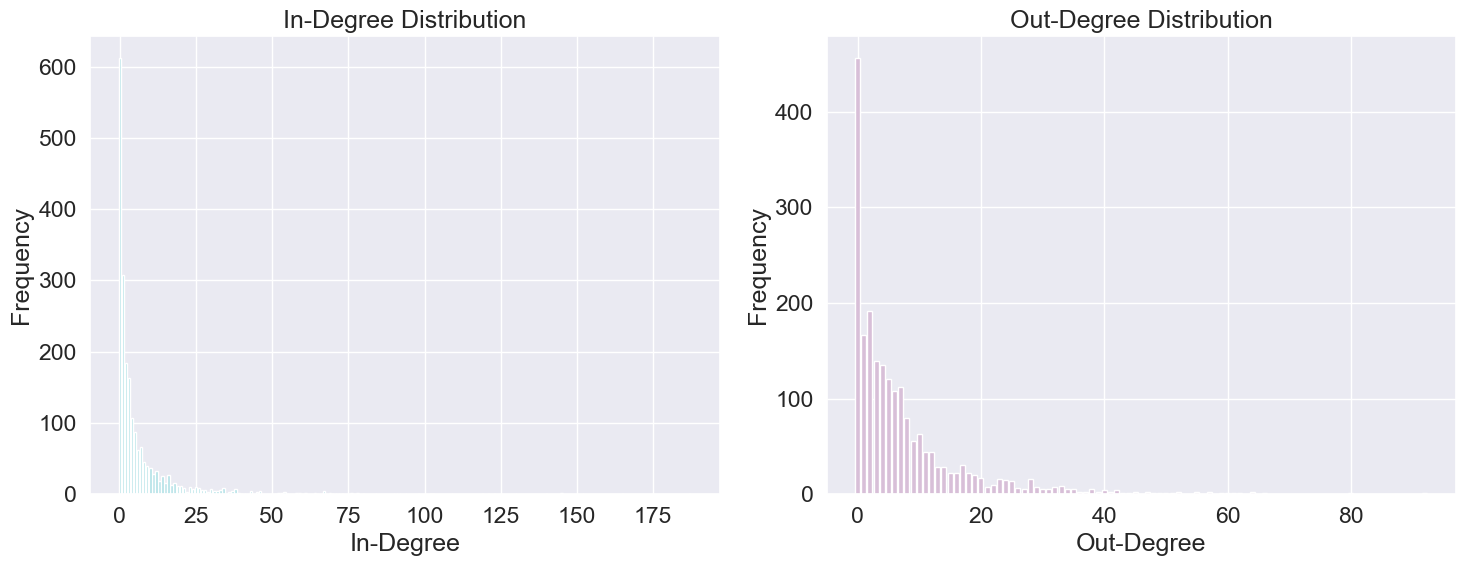

In [79]:
in_degrees = [d for n, d in G.in_degree()]
in_degree_count = Counter(in_degrees)
out_degrees = [d for n, d in G.out_degree()]
out_degree_count = Counter(out_degrees)

# Create a supblot with 2 plots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].bar(in_degree_count.keys(), in_degree_count.values(), color='powderblue')
axs[0].set_title('In-Degree Distribution')
axs[0].set_xlabel('In-Degree')
axs[0].set_ylabel('Frequency')

axs[1].bar(out_degree_count.keys(), out_degree_count.values(), color='thistle')
axs[1].set_title('Out-Degree Distribution')
axs[1].set_xlabel('Out-Degree')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

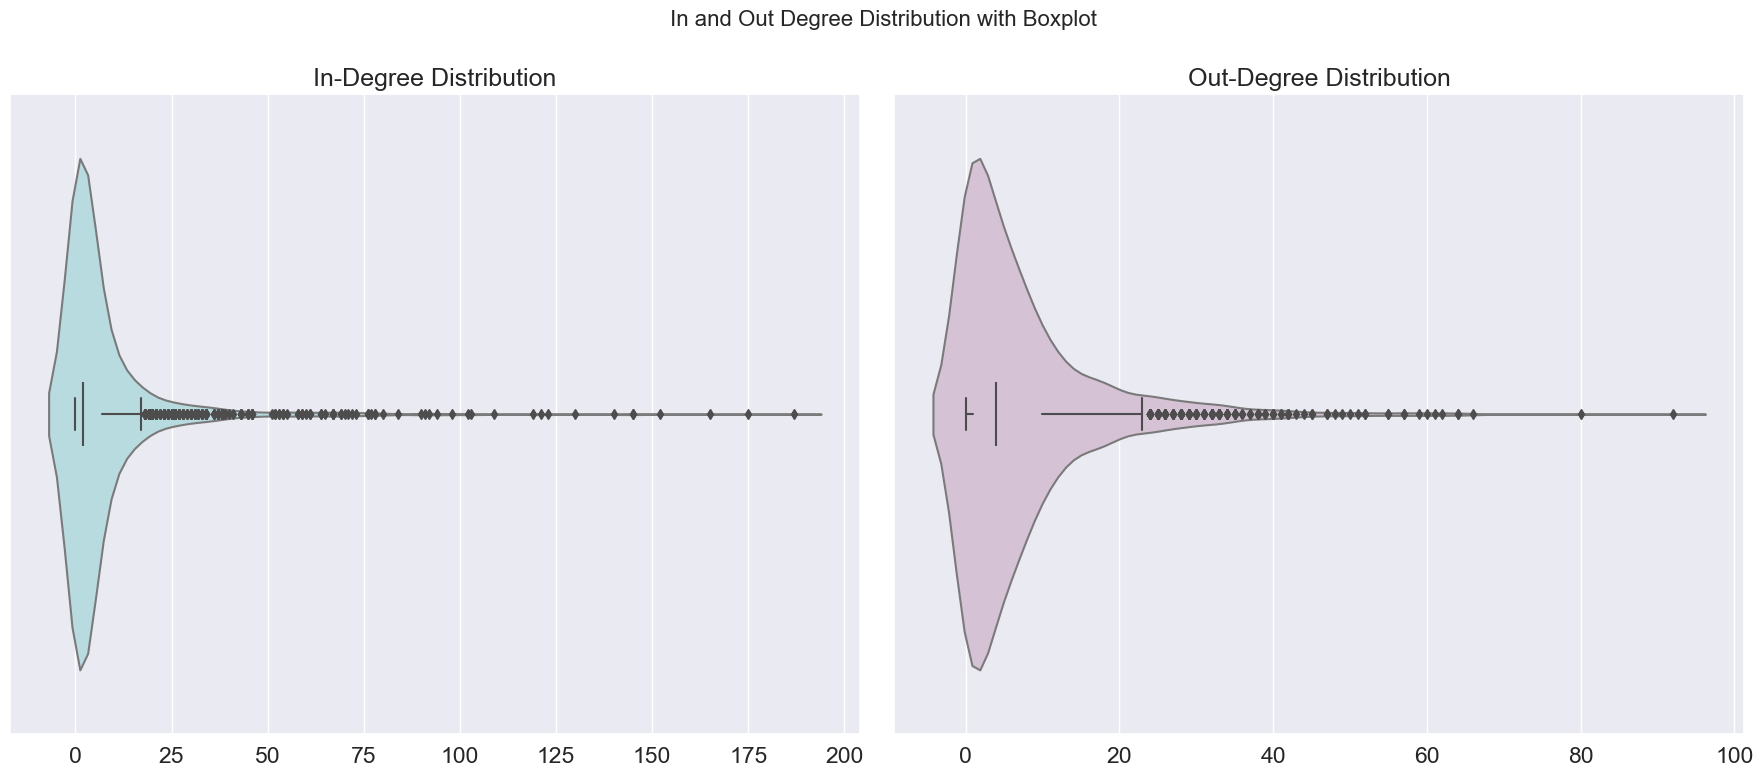

In [54]:
# Violin plot of both in-degrees and out-degrees with boxplots inside
fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # Increase figure size

# Violin plot for in-degrees
sns.violinplot(x=in_degrees, ax=axs[0], color="powderblue", inner=None)  # inner=None to remove the default plot inside
sns.boxplot(x=in_degrees, ax=axs[0], width=0.1, color="gray")  # Overlay the boxplot
axs[0].set_title('In-Degree Distribution')

# Violin plot for out-degrees
sns.violinplot(x=out_degrees, ax=axs[1], color="thistle", inner=None)  # inner=None to remove the default plot inside
sns.boxplot(x=out_degrees, ax=axs[1], width=0.1, color="gray")  # Overlay the boxplot
axs[1].set_title('Out-Degree Distribution')

# Add a general title for the figure
fig.suptitle('In and Out Degree Distribution with Boxplot', fontsize=16)

# Adjust layout to avoid overlap between title and plots
plt.tight_layout()

plt.show()

In [75]:
# Show the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Graph has {num_nodes} nodes and {num_edges} edges.")
print("\n")
# Top in and out degree performers
top_in_degree = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 performers by in-degree:")
print("\n".join([f"{node}: {degree}" for node, degree in top_in_degree]))
print("\n")

top_out_degree = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 performers by out-degree:")
print("\n".join([f"{node}: {degree}" for node, degree in top_out_degree]))
print("\n")

# 10 longest pages in content
longest_pages = sorted(G.nodes(data=True), key=lambda x: x[1]['content_length'], reverse=True)[:10]
print("10 longest pages in content:")
print("\n".join([f"{node}: {data['content_length']} words" for node, data in longest_pages]))

Graph has 2091 nodes and 15383 edges.


Top 5 performers by in-degree:
Willie Nelson: 187
Johnny Cash: 175
Elvis Presley: 165
Dolly Parton: 152
George Jones: 145


Top 5 performers by out-degree:
Hillary Lindsey: 92
Pam Tillis: 80
Randy Travis: 66
Patty Loveless: 64
Vince Gill: 64


10 longest pages in content:
Beyoncé: 62853 words
Taylor Swift: 56429 words
Miley Cyrus: 51262 words
Justin Bieber: 50694 words
Carrie Underwood: 45235 words
Justin Timberlake: 44779 words
Demi Lovato: 44012 words
Bob Dylan: 41141 words
Ed Sheeran: 36312 words
Alabama: 34386 words


> ### 1. Network Nodes
> - The network contains 2,091 nodes.
> - From the "List of Country Music Performers" page on Wikipedia, we extracted 2,100 artist names using regular expressions.
> - We then used the Wikipedia API to search for each artist and successfully retrieved 2,091 pages, with 9 pages not found.
> - Each node in the graph represents an artist name found through the Wikipedia API.
> 
> ### 2. Number of Links
> - The network has 15,383 links.
> - Although we retrieved 2,091 pages, some contained content unrelated to the performers (e.g., events or individuals with the same name).
> - This resulted in missing content and incomplete edge construction in some cases.
> 
> ### 3. Degree Distribution
> - Both the in-degree and out-degree distributions are right-skewed, with a notable spike at 0 out-degree. 
>   - Many artists or pages have no outgoing links and do not receive any links.
>   - Most nodes have a low out-degree, while a small number of nodes have high out-degrees, ranging up to 80–90, though these high values are rare.
>   - The frequency of high out-degrees declines rapidly as the out-degree increases, indicating only a few nodes link to many others.
>   - Conversely, some nodes have a high in-degree, showing a disproportionate number of incoming links.
> 
> #### 3.1 Out-Degree Distribution Comparison
> - Compared to a random network with the same number of nodes and links, the out-degree distribution differs:
>   - In a random network, the out-degree would follow a normal distribution, with most nodes having an average number of outgoing links and few nodes having very high or very low out-degrees.
> 
> #### 3.2 In-Degree Distribution Comparison
> - The in-degree distribution resembles that of a scale-free network, where the distribution is also right-skewed.
> 
> ### 4. Top 5 Most Connected Performers
> - **Top 5 Performers by In-Degree** (most incoming links):
>   1. Willie Nelson (188 in-degrees)
>   2. Johnny Cash (175 in-degrees)
>   3. Elvis Presley (165 in-degrees)
>   4. Dolly Parton (151 in-degrees)
>   5. George Jones (145 in-degrees)
> 
> - **Top 5 Performers by Out-Degree** (most outgoing links):
>   1. Hillary Lindsey (92 out-degrees)
>   2. Pam Tillis (80 out-degrees)
>   3. Randy Travis (66 out-degrees)
>   4. Patty Loveless (64 out-degrees)
>   5. Vince Gill (64 out-degrees)
> 
> ### 5. Top 10 Longest Pages by Word Count
> 1. Beyoncé: 62,853 words
> 2. Taylor Swift: 56,429 words
> 3. Miley Cyrus: 51,262 words
> 4. Justin Bieber: 50,694 words
> 5. Carrie Underwood: 45,235 words
> 6. Justin Timberlake: 44,779 words
> 7. Demi Lovato: 44,012 words
> 8. Bob Dylan: 41,141 words
> 9. Ed Sheeran: 36,312 words
> 10. Alabama: 34,386 words
> 

### Random network

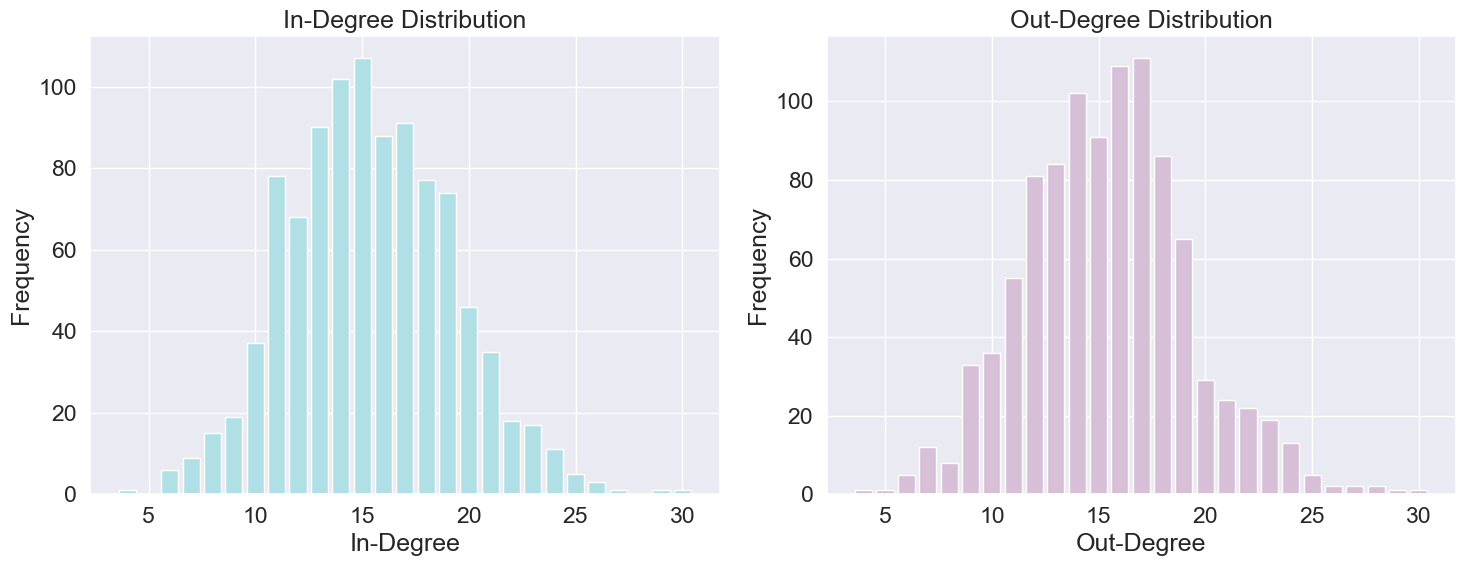

In [78]:
random_graph = nx.gnm_random_graph(num_nodes, num_edges, directed=True)
random_in_degrees = [d for n, d in random_graph.in_degree()]
random_in_degree_count = Counter(random_in_degrees)
random_out_degrees = [d for n, d in random_graph.out_degree()]
random_out_degree_count = Counter(random_out_degrees)

# Create a supblot with 2 plots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].bar(random_in_degree_count.keys(), random_in_degree_count.values(), color='powderblue')
axs[0].set_title('In-Degree Distribution')
axs[0].set_xlabel('In-Degree')
axs[0].set_ylabel('Frequency')
# Inter xticks to avoid overlap

axs[1].bar(random_out_degree_count.keys(), random_out_degree_count.values(), color='thistle')
axs[1].set_title('Out-Degree Distribution')
axs[1].set_xlabel('Out-Degree')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Barbasi graph

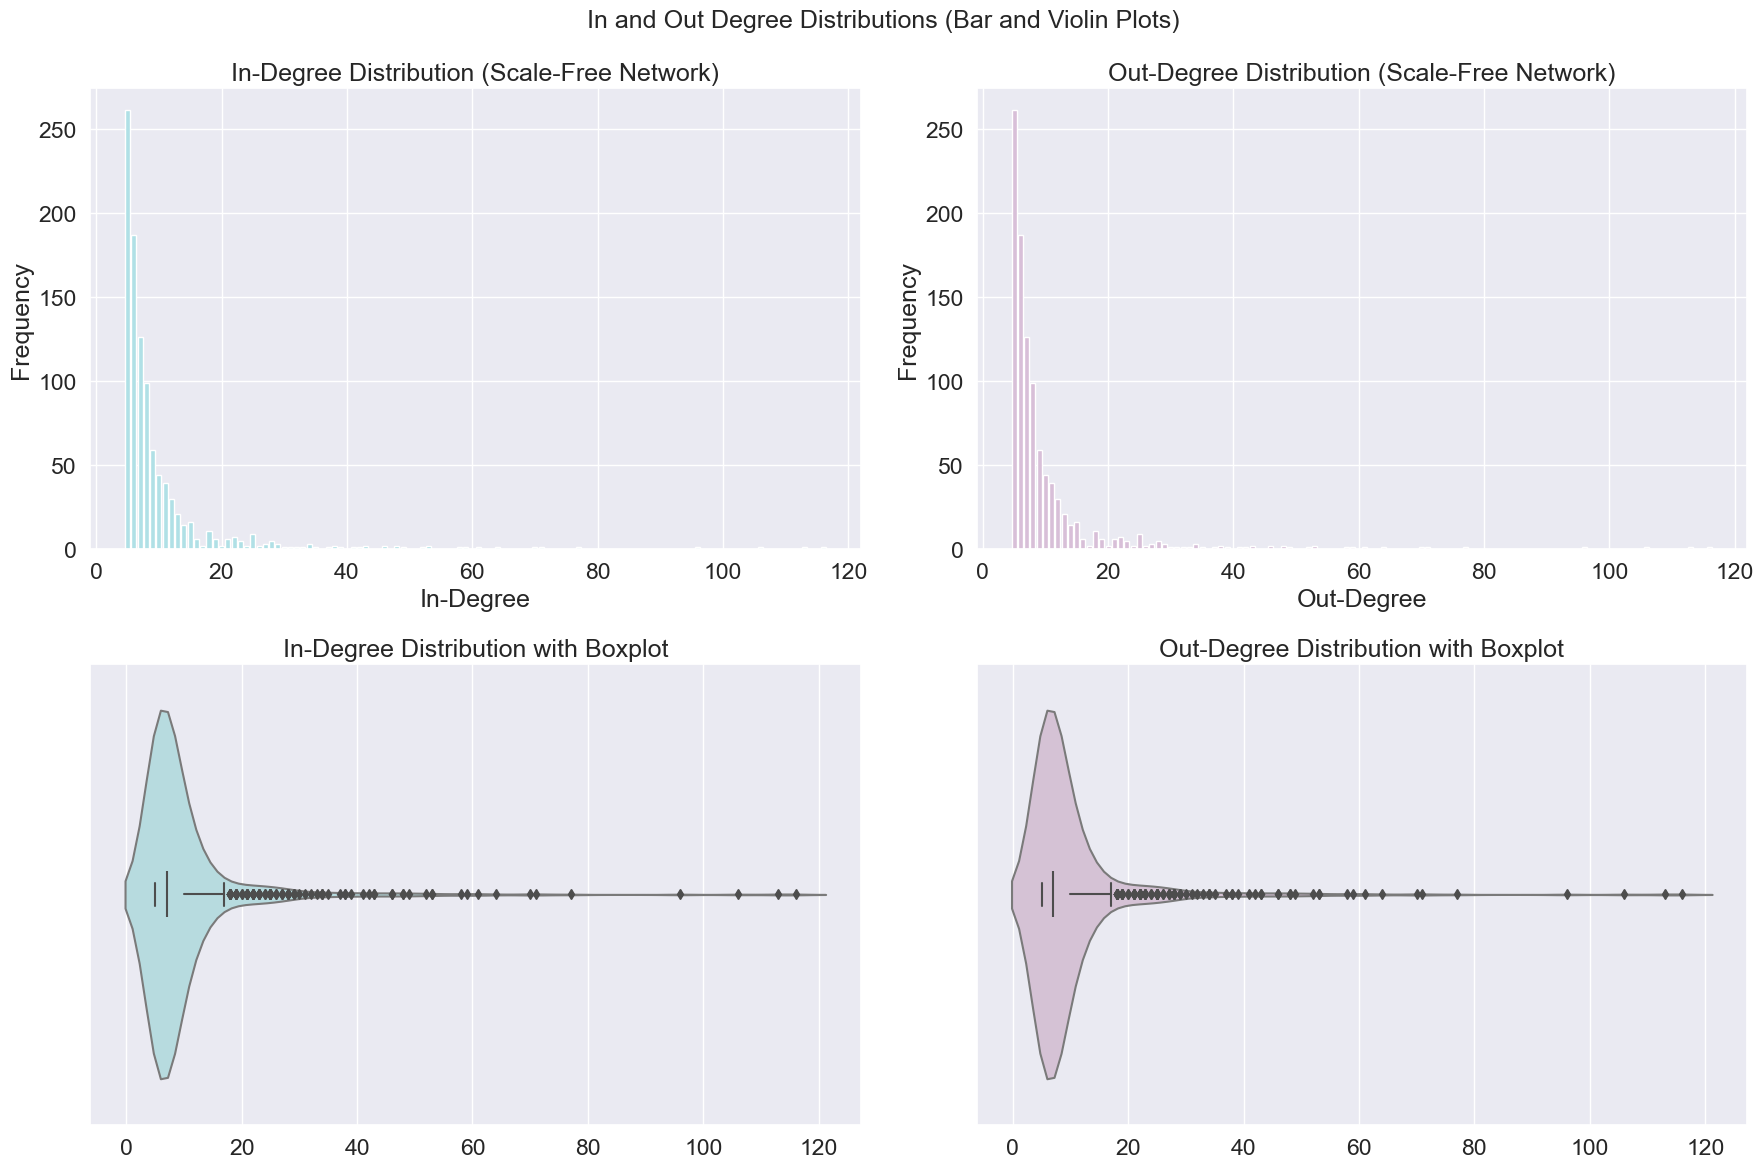

In [77]:
# Generate scale-free graph
num_nodes = 1000  # Adjust as necessary
scale_free_graph = nx.barabasi_albert_graph(num_nodes, 5).to_directed()  
scale_free_in_degrees = [d for n, d in scale_free_graph.in_degree()]
scale_free_in_degree_count = Counter(scale_free_in_degrees)
scale_free_out_degrees = [d for n, d in scale_free_graph.out_degree()]
scale_free_out_degree_count = Counter(scale_free_out_degrees)

# Create subplot with 2x2 grid (4 plots)
fig, axs = plt.subplots(2, 2, figsize=(18, 12))  # Adjust figure size

# Bar chart for in-degree distribution
axs[0, 0].bar(scale_free_in_degree_count.keys(), scale_free_in_degree_count.values(), color="powderblue")
axs[0, 0].set_title('In-Degree Distribution (Scale-Free Network)')
axs[0, 0].set_xlabel('In-Degree')
axs[0, 0].set_ylabel('Frequency')

# Bar chart for out-degree distribution
axs[0, 1].bar(scale_free_out_degree_count.keys(), scale_free_out_degree_count.values(), color="thistle")
axs[0, 1].set_title('Out-Degree Distribution (Scale-Free Network)')
axs[0, 1].set_xlabel('Out-Degree')
axs[0, 1].set_ylabel('Frequency')

# Violin plot for in-degrees
sns.violinplot(x=scale_free_in_degrees, ax=axs[1, 0], color="powderblue", inner=None)
sns.boxplot(x=scale_free_in_degrees, ax=axs[1, 0], width=0.1, color="gray")
axs[1, 0].set_title('In-Degree Distribution with Boxplot')

# Violin plot for out-degrees
sns.violinplot(x=scale_free_out_degrees, ax=axs[1, 1], color="thistle", inner=None)
sns.boxplot(x=scale_free_out_degrees, ax=axs[1, 1], width=0.1, color="gray")
axs[1, 1].set_title('Out-Degree Distribution with Boxplot')

# Add a general title for the entire figure
fig.suptitle('In and Out Degree Distributions (Bar and Violin Plots)', fontsize=18)

# Adjust layout to avoid overlap between title and plots
plt.tight_layout()  # Adjust to make room for the title

# Show the combined figure
plt.show()

### Visualization of the network

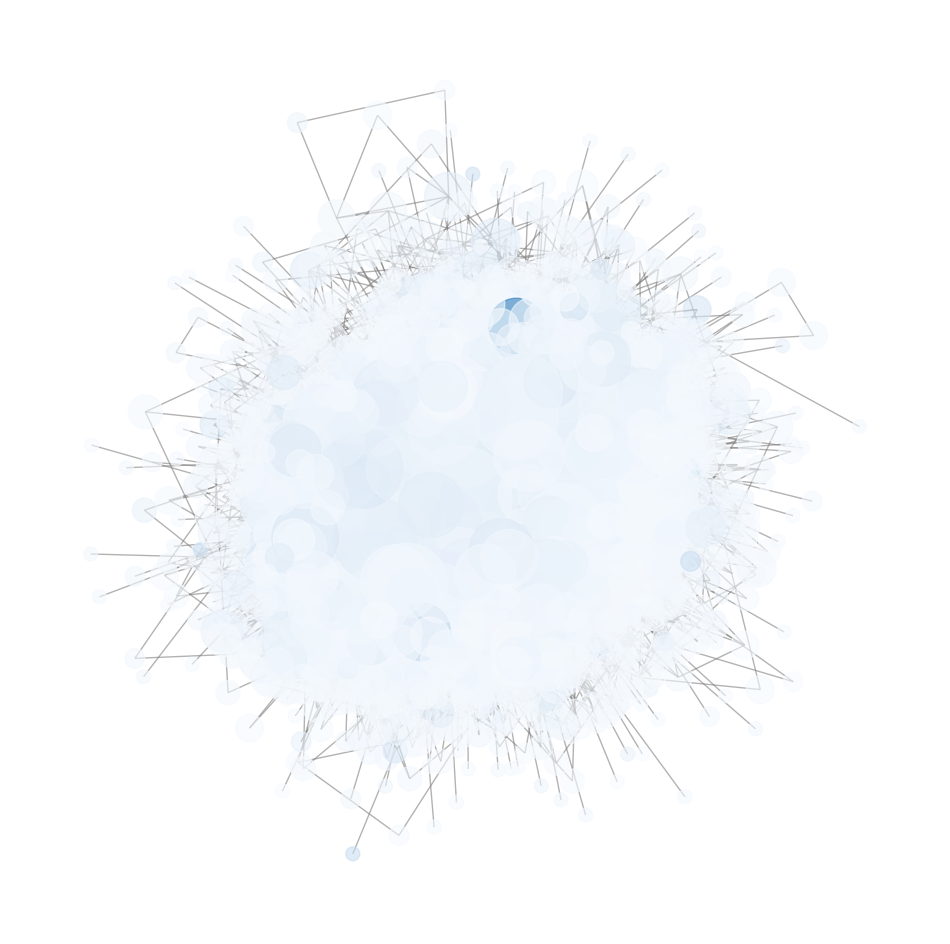

In [65]:
# Create an undirected version of the graph
undirected_G = G.to_undirected()

# Define node size and color based on the degree and content length
node_size = [G.degree(n) * 100 for n in undirected_G.nodes]
node_color = [undirected_G.nodes[n].get('content_length', 0) for n in undirected_G.nodes]

# Create a plot
fig, ax = plt.subplots(figsize=(12, 12))
nx.draw_kamada_kawai(
    undirected_G, 
    with_labels=False, 
    node_size=node_size, 
    node_color=node_color, 
    cmap=plt.cm.Blues,  
    edge_color='gray', 
    alpha=0.6, 
    ax=ax  
)
plt.show()